In [1]:
graph = 'graph.sqlite'

In [2]:
import database as db

In [3]:
db.initialize(graph)

### Node Creation

In [4]:
db.atomic(graph, db.add_node({'name': 'A'}, 1))
db.atomic(graph, db.add_node({'name': 'B'}, 2))
db.atomic(graph, db.add_node({'name': 'C'}, 3))
db.atomic(graph, db.add_node({'name': 'D'}, 4))
db.atomic(graph, db.add_node({'name': 'E'}, 5))
db.atomic(graph, db.add_node({'name': 'F'}, 6))
db.atomic(graph, db.add_node({'name': 'G'}, 7))
db.atomic(graph, db.add_node({'name': 'H'}, 8))
db.atomic(graph, db.add_node({'name': 'I'}, 9))

### Node Connections

In [5]:
db.atomic(graph, db.connect_nodes(1, 2))
db.atomic(graph, db.connect_nodes(1, 3))
db.atomic(graph, db.connect_nodes(1, 5))
db.atomic(graph, db.connect_nodes(1, 7))
db.atomic(graph, db.connect_nodes(1, 9))

db.atomic(graph, db.connect_nodes(2, 1))
db.atomic(graph, db.connect_nodes(2, 2))
db.atomic(graph, db.connect_nodes(2, 5))
db.atomic(graph, db.connect_nodes(2, 6))
db.atomic(graph, db.connect_nodes(2, 8))

db.atomic(graph, db.connect_nodes(3, 1))
db.atomic(graph, db.connect_nodes(3, 5))
db.atomic(graph, db.connect_nodes(3, 6))
db.atomic(graph, db.connect_nodes(3, 7))
db.atomic(graph, db.connect_nodes(3, 9))

db.atomic(graph, db.connect_nodes(4, 1))
db.atomic(graph, db.connect_nodes(4, 2))
db.atomic(graph, db.connect_nodes(4, 3))
db.atomic(graph, db.connect_nodes(4, 5))
db.atomic(graph, db.connect_nodes(4, 7))
db.atomic(graph, db.connect_nodes(4, 8))

db.atomic(graph, db.connect_nodes(5, 2))
db.atomic(graph, db.connect_nodes(5, 5))
db.atomic(graph, db.connect_nodes(5, 6))
db.atomic(graph, db.connect_nodes(5, 8))

db.atomic(graph, db.connect_nodes(6, 1))
db.atomic(graph, db.connect_nodes(6, 6))
db.atomic(graph, db.connect_nodes(6, 7))
db.atomic(graph, db.connect_nodes(6, 8))

db.atomic(graph, db.connect_nodes(7, 4))
db.atomic(graph, db.connect_nodes(7, 7))

db.atomic(graph, db.connect_nodes(8, 1))
db.atomic(graph, db.connect_nodes(8, 3))
db.atomic(graph, db.connect_nodes(8, 4))
db.atomic(graph, db.connect_nodes(8, 5))
db.atomic(graph, db.connect_nodes(8, 6))
db.atomic(graph, db.connect_nodes(8, 9))

db.atomic(graph, db.connect_nodes(9, 1))
db.atomic(graph, db.connect_nodes(9, 2))
db.atomic(graph, db.connect_nodes(9, 3))
db.atomic(graph, db.connect_nodes(9, 4))
db.atomic(graph, db.connect_nodes(9, 9))

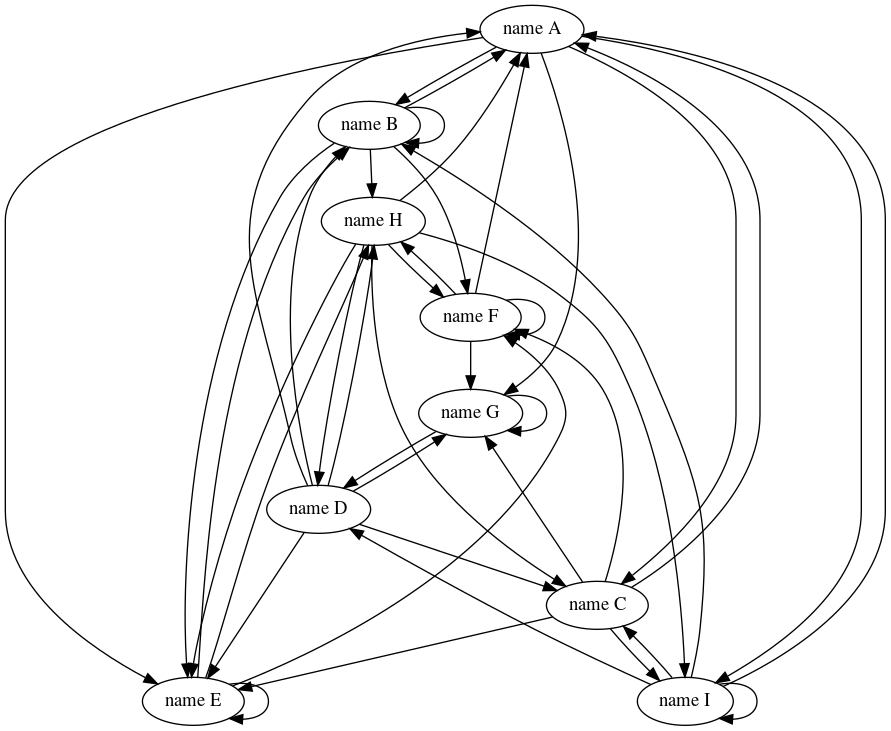

In [6]:
db.visualize(graph, 'graph.dot', [1, 2, 3, 4, 5, 6, 7, 8, 9])
from IPython.display import Image
Image(filename='graph.dot.png') 

### All vertices you can reach in one step from one or combination of nodes

In [7]:
def get_one_step_nodes(*argv, cond='and'):
    '''
    argv: names of input vertices
    cond: 'or' | 'and' (default)
            and means find vertices which can be reached from all input vertices
            or means find vertices which can be reached from any of the input vertices    
    '''
    
    lst = []
    for key in argv:
        lst.append(db.atomic(graph, db.find_nodes({'name': key}))[0].get('id'))   
    result_set = set()  
    for i, n in enumerate(lst):
        temp_set = set()
        connections = db.get_connections_one_way(n, direction=db.connections_in)
        for node in db.atomic(graph, connections):
            x = node[1]
            temp_set.add(db.atomic(graph, db.find_node(int(x))).get('name'))        
                
        if(cond=='or'):
            result_set = result_set.union(temp_set)
        
        elif(cond == 'and'):
            if(i == 0):
                result_set = temp_set
                continue
            result_set = result_set.intersection(temp_set)
        else:
            return 'Invalid Condition !'
        
    return result_set


In [8]:
get_one_step_nodes('A', 'D','E')

{'B', 'E'}

### All vertices you can reach in 'n' steps from any node

In [9]:
def get_n_steps_nodes(item, n=2):
    '''
    item: node_name
    n: no. of steps
    '''
    if n==1:
        return get_one_step_nodes(item)
    else:
        result_set = set()
        for node in get_one_step_nodes(item):
            result_set = result_set.union(get_n_steps_nodes(node, n-1))
        return result_set


In [11]:
get_n_steps_nodes('G', n=1)

{'D', 'G'}

In [10]:
get_n_steps_nodes('G', n=2)

{'A', 'B', 'C', 'D', 'E', 'G', 'H'}

In [12]:
get_n_steps_nodes('G', n=3)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'}